21b01a1288
# Multiple Linear Regresion

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt #  for visualizations
import seaborn as sns           #  for visualizations
import pandas as pd
from sklearn.linear_model import LinearRegression        # Linear Regression is the model on which we have to work
from sklearn.metrics import r2_score                     # for calculating accracy
from sklearn.model_selection import train_test_split     # to split the dataset into training and testing datasets

import warnings                       # to ignore any warning during execution
warnings.filterwarnings("ignore")


In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]


In [4]:
#Convert the column into categorical columns
states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [5]:
# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)

In [7]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


# Splitting the Dataset (Training, Testing )

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Liner Regression

In [7]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [9]:

score=r2_score(y_test,y_pred)
score*100

93.47068473282422

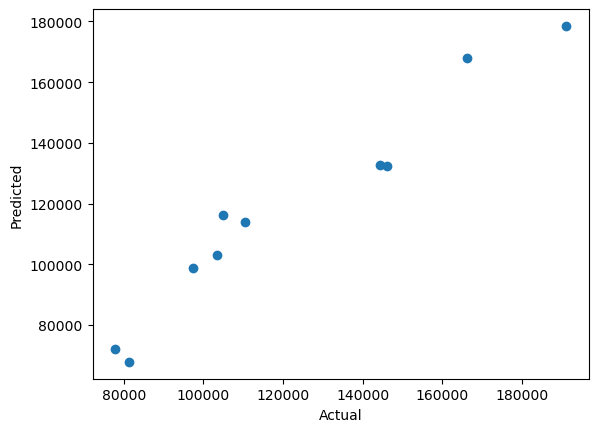

In [10]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

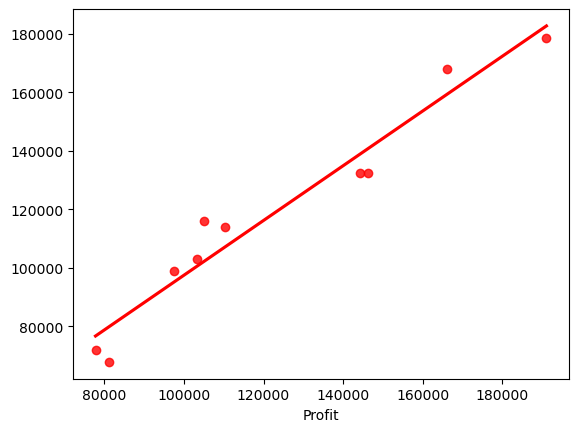

In [11]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [12]:
#predicted valules
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696
